# Handwritten Digit Recognizer

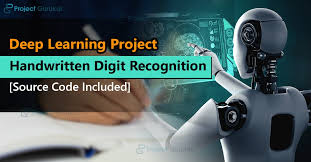

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Loading MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Normalizing Pixel Value

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Reshaping The Data for CNN Input

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Convert labels to one-hot vectors

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Creating validation set from training data (to monitor model performance and avoid overfitting)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42)

print("Train:", x_train.shape)
print("Validation:", x_val.shape)
print("Test:", x_test.shape)

Train: (54000, 28, 28, 1)
Validation: (6000, 28, 28, 1)
Test: (10000, 28, 28, 1)


## Data Samples

Plotting multiple digit samples

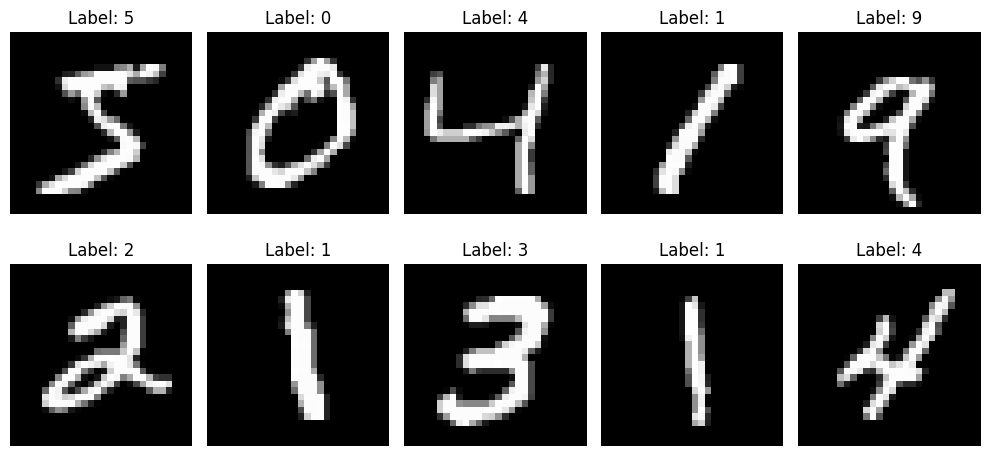

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Bar chart of label distribution

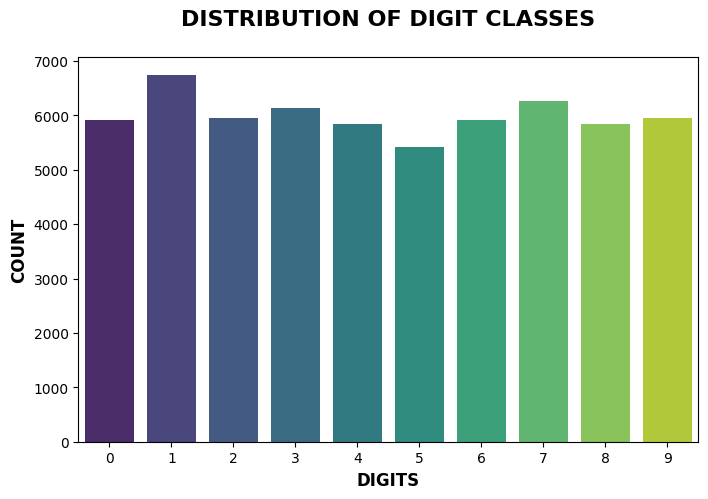

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=train_labels, palette='viridis')

# Main title
plt.title("DISTRIBUTION OF DIGIT CLASSES\n", fontsize=16, fontweight='bold')

# X and Y axis labels
plt.xlabel("DIGITS", fontsize=12, fontweight='bold')
plt.ylabel("COUNT", fontsize=12, fontweight='bold')

plt.show()

**CNN Architecture for MNIST Digit Classification**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output before feeding into the dense layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization

# Output Layer
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0–9

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],run_eagerly=True)

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Model Training Part**

Original training data shape: (60000, 28, 28)
Original test data shape: (10000, 28, 28)
Training set: (54000, 28, 28, 1)
Validation set: (6000, 28, 28, 1)
Test set: (10000, 28, 28, 1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 74ms/step - accuracy: 0.7885 - loss: 0.6645 - val_accuracy: 0.9798 - val_loss: 0.0682
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.9675 - loss: 0.1059 - val_accuracy: 0.9858 - val_loss: 0.0476
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 72ms/step - accuracy: 0.9746 - loss: 0.0817 - val_accuracy: 0.9892 - val_loss: 0.0384
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9824 - loss: 0.0596 - val_accuracy: 0.9898 - val_loss: 0.0346
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.9843 - loss: 0.0510 - val_accuracy: 0.9902 - val_loss: 0.0324
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9865 - loss: 0.0454 - val_accuracy: 0.9912 - val_loss: 0.0313
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.9884 - loss: 0.0359 - val_accuracy: 0.9913 - val_loss: 0.0301
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.9900 - loss: 0.0319 - 

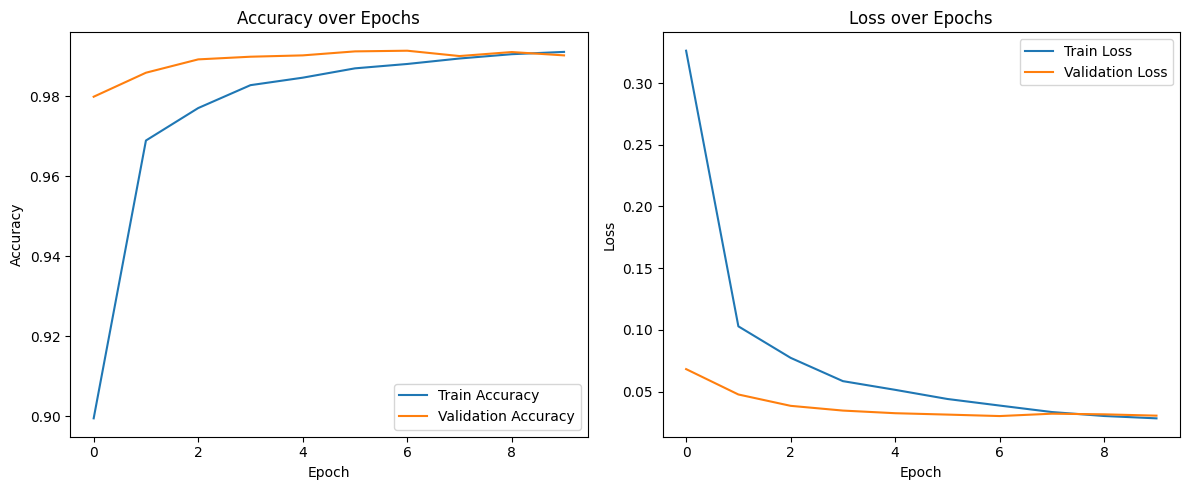

✅ Model saved as digit_recognizer_model.h5


In [ ]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Original training data shape:", x_train.shape)
print("Original test data shape:", x_test.shape)

# Step 3: Normalize the pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 4: Reshape images to (28, 28, 1) for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 5: One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 6: Create a validation set from the training data
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42)

print("Training set:", x_train.shape)
print("Validation set:", x_val.shape)
print("Test set:", x_test.shape)

# Step 7: Build the CNN Model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

# Step 8: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],run_eagerly=True
)

# Step 9: Show model summary
model.summary()

# Step 10: Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=1
)

# Step 11: Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 12: Save the trained model
model.save("digit_recognizer_model.h5")
print("✅ Model saved as digit_recognizer_model.h5")


In [ ]:
# Print training and validation accuracies
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Final Training Accuracy: 0.9910
Final Validation Accuracy: 0.9902
Test Accuracy: 0.9916


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict the probabilities for the test set
y_pred_probs = model.predict(x_test)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert the one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Generate and print the classification report
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



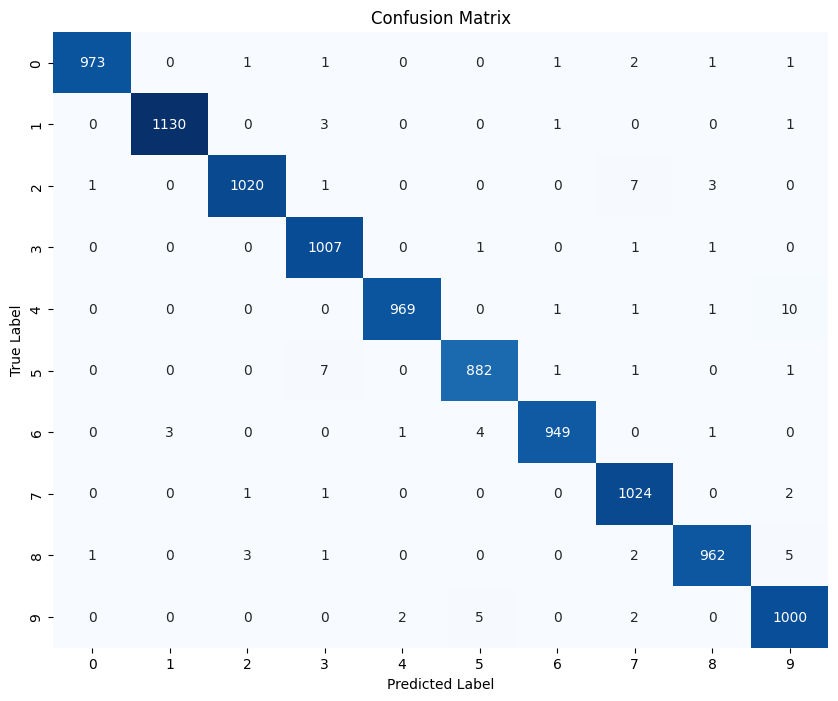

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

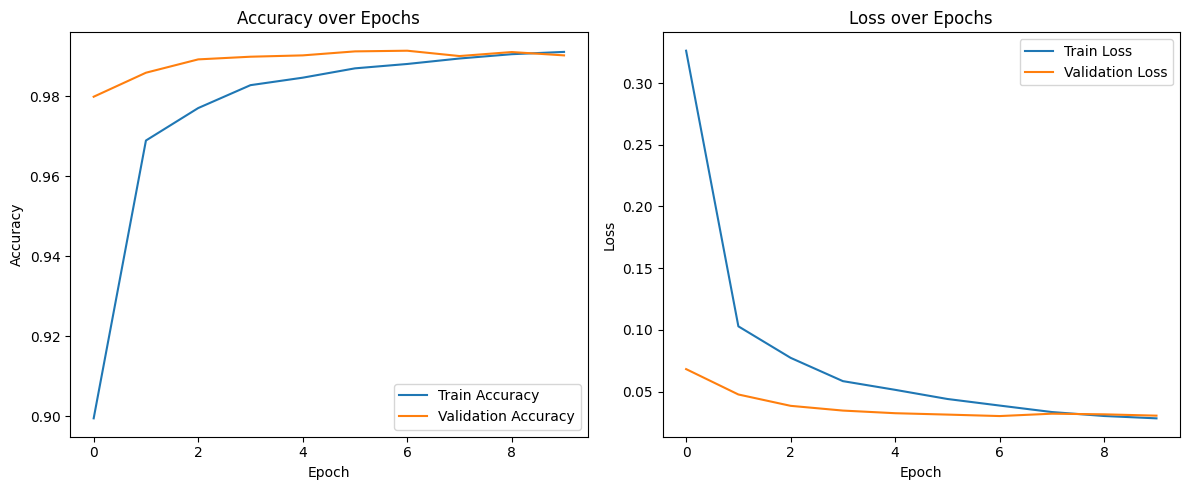

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Analyze Misclassified Digits:

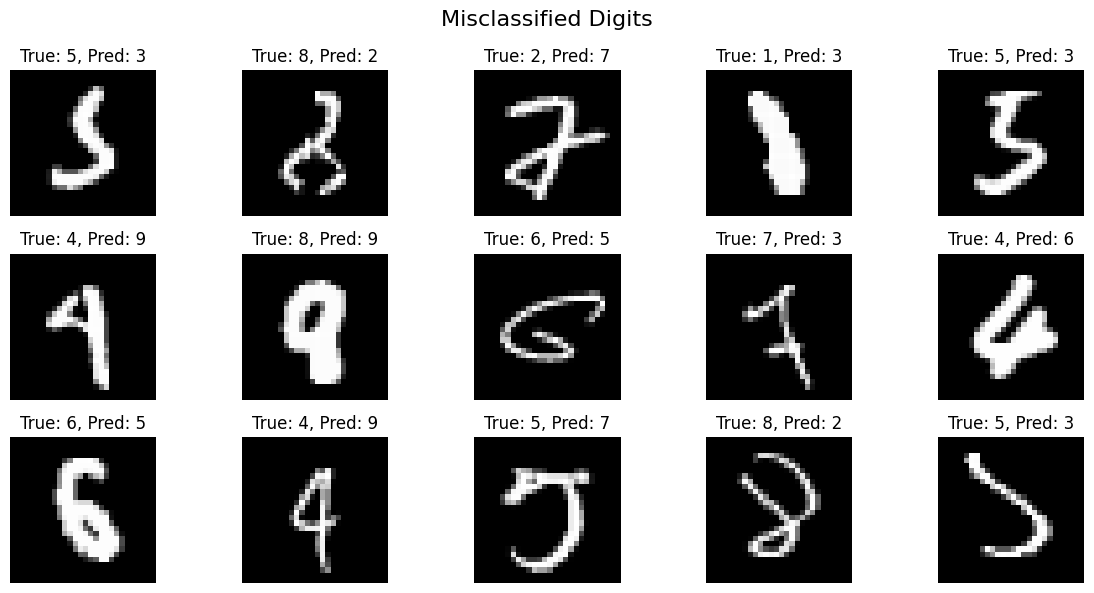

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get incorrect predictions
incorrect = np.where(y_pred != y_true)[0]

# Visualize some of them
plt.figure(figsize=(12, 6))
for i, idx in enumerate(incorrect[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Misclassified Digits", fontsize=16)
plt.tight_layout()
plt.show()


A. Add BatchNormalization:

 Tune Learning Rate:

Increase Epochs or Add EarlyStopping:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf # Import tensorflow

# Enable eager execution
# tf.config.run_eagerly(True) # This line is removed

early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=15, batch_size=64,
                    validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 62s 73ms/step - accuracy: 0.9890 - loss: 0.0330 - val_accuracy: 0.9910 - val_loss: 0.0334
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 62s 74ms/step - accuracy: 0.9906 - loss: 0.0283 - val_accuracy: 0.9918 - val_loss: 0.0308
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 62s 73ms/step - accuracy: 0.9918 - loss: 0.0254 - val_accuracy: 0.9910 - val_loss: 0.0335
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 61s 73ms/step - accuracy: 0.9929 - loss: 0.0220 - val_accuracy: 0.9930 - val_loss: 0.0336
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 60s 71ms/step - accuracy: 0.9935 - loss: 0.0208 - val_accuracy: 0.9915 - val_loss: 0.0313


Compare & Document Results:

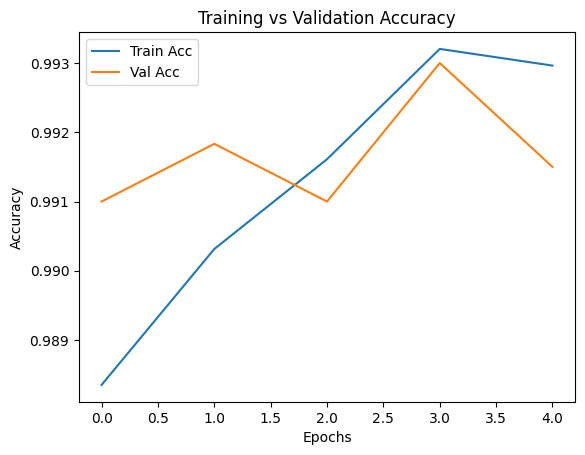

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'],run_eagerly=True)


In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),  # Tuned from 0.5 to 0.4
    Dense(10, activation='softmax')
])


Identify Common Failure Patterns:

In [ ]:
from collections import Counter

confusion_pairs = [(y_true[i], y_pred[i]) for i in incorrect]
most_common_errors = Counter(confusion_pairs).most_common(10)

print("Most common misclassifications:")
for (true_label, predicted_label), count in most_common_errors:
    print(f"True: {true_label}, Predicted: {predicted_label} — Count: {count}")

Most common misclassifications:
True: 4, Predicted: 9 — Count: 10
True: 5, Predicted: 3 — Count: 7
True: 2, Predicted: 7 — Count: 7
True: 8, Predicted: 9 — Count: 5
True: 9, Predicted: 5 — Count: 5
True: 6, Predicted: 5 — Count: 4
True: 8, Predicted: 2 — Count: 3
True: 1, Predicted: 3 — Count: 3
True: 6, Predicted: 1 — Count: 3
True: 2, Predicted: 8 — Count: 3


Analyze Misclassified Digits:

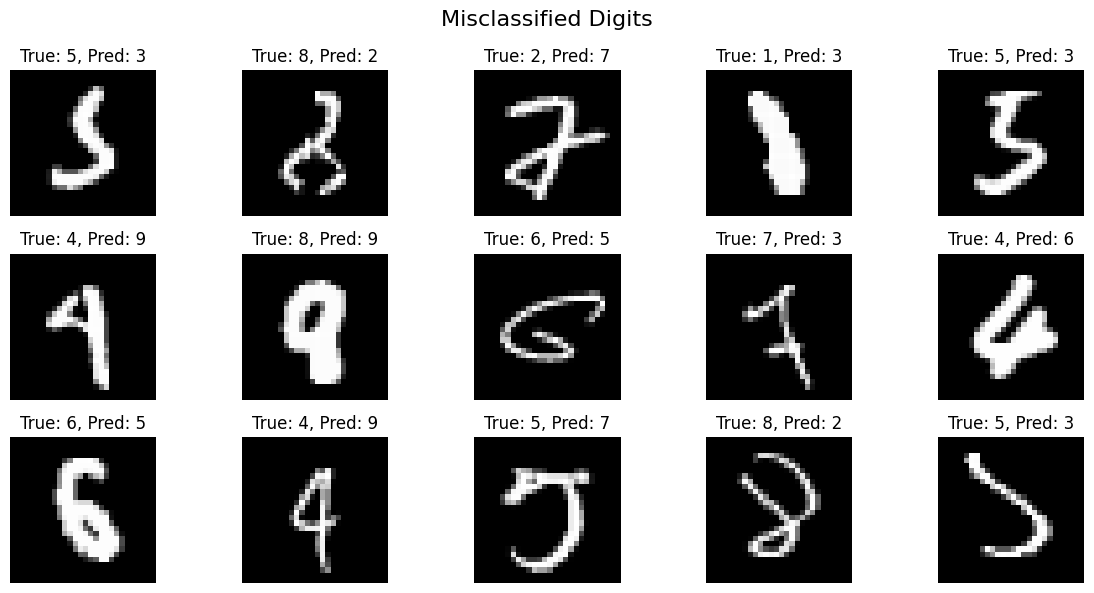

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get incorrect predictions
incorrect = np.where(y_pred != y_true)[0]

# Visualize some of them
plt.figure(figsize=(12, 6))
for i, idx in enumerate(incorrect[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Misclassified Digits", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:

import gradio as gr
import numpy as np
import tensorflow as tf
from PIL import Image

# ✅ Load model
model = tf.keras.models.load_model("digit_recognizer_model.h5")
# Compile to avoid warning
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Preprocessing function (works for both PIL Images and numpy arrays)
def preprocess(img):
    # Convert to PIL Image if it's a numpy array
    if isinstance(img, np.ndarray):
        if img.ndim == 3:
            # Handle RGB/RGBA arrays
            if img.shape[2] == 4:  # RGBA
                # Use alpha channel to handle transparency properly
                rgb = img[:, :, :3]
                alpha = img[:, :, 3] / 255.0
                # Create white background
                white_bg = np.ones_like(rgb) * 255
                # Blend with white background
                img = (rgb * alpha[:, :, np.newaxis] +
                      white_bg * (1 - alpha[:, :, np.newaxis]))
                img = np.mean(img, axis=2)
            else:  # RGB
                img = np.mean(img, axis=2)

        # Ensure proper data type and range
        if img.dtype != np.uint8:
            if img.max() <= 1.0:
                img = (img * 255).astype(np.uint8)
            else:
                img = img.astype(np.uint8)

        # Convert to PIL Image
        img = Image.fromarray(img, mode="L")

    # Now we have a PIL Image - process it
    img = img.convert("L")  # Convert to grayscale (safe even if already grayscale)
    img = img.resize((28, 28))  # Resize to 28x28
    img_array = np.array(img) / 255.0  # Normalize
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for model
    return img_array

# ✅ Prediction function
def predict_digit(image):
    if image is None:
        return "No image provided", ""

    try:
        processed_image = preprocess(image)
        prediction = model.predict(processed_image)[0]
        digit = int(np.argmax(prediction))
        confidence = float(np.max(prediction))
        return f"Predicted Digit: {digit}", f"Confidence: {confidence:.2f}"
    except Exception as e:
        return f"Error: {str(e)}", ""

# ✅ Handle drawing input (returns numpy array)
def handle_drawing(drawn_image):
    if drawn_image is None:
        return "No drawing provided", ""

    # Handle Sketchpad output
    if isinstance(drawn_image, dict) and 'composite' in drawn_image:
        drawn_image = drawn_image['composite']

    return predict_digit(drawn_image)

# ✅ Handle upload input (returns PIL Image)
def handle_upload(uploaded_image):
    if uploaded_image is None:
        return "No image uploaded", ""

    return predict_digit(uploaded_image)

# ✅ Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## ✍️ Handwritten Digit Recognizer")
    gr.Markdown("Draw a digit or upload an image and press **Submit** to classify it.")

    with gr.Row():
        with gr.Column():
            with gr.Tabs():
                with gr.Tab("Draw Digit"):
                    draw_input = gr.Sketchpad(label="Draw a digit (0-9)", type="numpy", image_mode="L")
                    draw_submit = gr.Button("Predict Drawing", variant="primary")
                    draw_clear = gr.Button("Clear Drawing")

                with gr.Tab("Upload Image"):
                    upload_input = gr.Image(type="pil", label="Upload an image")
                    upload_submit = gr.Button("Predict Upload", variant="primary")
                    upload_clear = gr.Button("Clear Upload")

        with gr.Column():
            prediction_output = gr.Text(label="Prediction", interactive=False)
            confidence_output = gr.Text(label="Confidence", interactive=False)

    # ✅ Button connections
    # Drawing tab
    draw_submit.click(
        fn=handle_drawing,
        inputs=draw_input,
        outputs=[prediction_output, confidence_output]
    )
    draw_clear.click(
        fn=lambda: (None, "", ""),
        inputs=None,
        outputs=[draw_input, prediction_output, confidence_output]
    )

    # Upload tab
    upload_submit.click(
        fn=handle_upload,
        inputs=upload_input,
        outputs=[prediction_output, confidence_output]
    )
    upload_clear.click(
        fn=lambda: (None, "", ""),
        inputs=None,
        outputs=[upload_input, prediction_output, confidence_output]
    )

# ✅ Launch the app
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://99920baed026402588.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
